# Zadanie projektowe

## Uwagi wstępne

Tworząc ten notatnik i rozwiązaując poniższe zadania krok po kroku, wzorowałem się na etapach/fazach CRISP-DM. Niestety, zdanie z terści zadania: " następnie kolejno rozwiązania poszczególnych podzadań – tekst z opisem oraz kody do uruchomienia. " przeczytałem już po zakończeniu projektu. Jako, że na tym etapie zmienienie formatu projektu mogłoby być trudne do wykoania, do poniższych zadań umieszczam lokalizacje (informacje w której fazie zostało zadanie wykonane).

1. Określ liczbę obiektów, liczbę klas, zakresy zmienności poszczególnych atrybutów, ich statystyki opisowe zarówno całego zbioru jak poszczególnych klas. Jakie wnioski możesz na ich podstawie sformułować ? - Faza 2.
2. Oceń wizualnie (analizując wykresy punktowe, macierz wykresów punktowych) czy podział na grupy reprezentowany przez atrybut decyzyjny odpowiada naturalnym skupieniom danych w przestrzeni atrybutów oraz czy dane są skorelowane. Przeprowadź także analizę korelacji z wykorzystaniem odpowiednich miar. Sformułuj wnioski. - Faza 2.
3. Oceń wizualnie (korzystając z wykresów) czy do poprawnej klasyfikacji należy wykorzystać wszystkie atrybuty, czy wystarczy ich podzbiór ? Jeśli podzbiór byłby korzystniejszy z punktu widzenia klasyfikacji, to go wygeneruj. Oceń czy wybrane atrybuty wymagają normalizacji lub standaryzacji. Jeśli tak, to wykonaj ją. - Faza 3.
4. Przetestuj poznane Ci klasyfikatory. Przyjmij sensowną miarę jakości klasyfikacji i znajdź zgodny z nią najlepszy klasyfikator. - Faza 4 i faza 5. - Techniki uczenia nadzorowanego
5. Dokonaj grupowania danych pomijając atrybut decyzyjny. Wykonaj grupowanie dla różnych liczb grup, znajdź optymalną liczbę grup. Czy otrzymany podział jest zgodny z podziałem na klasy zawartym w atrybucie decyzyjnym ? Czy jest zgodny z wnioskami otrzymanymi w punkcie 2 ? - Faza 4 i faza 5. - Techniki uczenia nienadzorowanego

## Faza 1. Zrozumienie biznesu
Opierając się o metodologię CRISP-DM W pierwszym kroku należałoby zrozumiec biznes (problem, który nalezy roziwązać), nastomiast w tym przypadku eksploracja nie ma żadnego z góry narzuconego celu oprócz przeprowadzenia analizy, grupowania i klasyfikacji na indywidualnie przygotowanym zbiorze. Dlatego przejdę od razu do fazy 2, którą jest zrozumienie danych.

## Faza 2. Zrozumienie danych
Celem tego kroku jest dogłębne poznanie naszych danych, ich struktury, jakości i ogólne odpowiedzenie sobie na pytanie czy są one wystarczajace do rozwiazania naszego problemu. 

Zasadniczo w fazie drugiej wykonuje się:
1. Exploratory Data Analysis (EDA) - to etap analityczny polegajacy na dokłądnym poznaniu struktury, zawartosci i właściości danych.
2. Data Cleanig i Preprocessing - Dane muszą być czyste i w odpowiedniej formie przed rozpoczęciem tworzenia modelu. W tym celu wykonuje się Data Cleanig i Preprocessing, który obejmuję czyszczynie i przekształcanie danych do użytecznego formatu.   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score

C:\Users\micha\AppData\Local\Temp\ipykernel_45392\1016914234.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('HiED_eksploracja_16.csv')
df.head(10)

Unnamed: 0         0         1         2         3          4         5  \
0           0 -1.128375 -2.366789  4.558300 -2.857641  -5.056359 -2.857641   
1           1  1.259990  4.031091  0.453629 -2.370334  -5.488193 -2.370334   
2           2 -0.771091 -1.224854 -2.353296  0.657258  -4.234517  0.657258   
3           3  0.512798 -4.033628  3.667745 -4.462235  -7.074139 -4.462235   
4           4  0.282831  3.085310  0.917489 -3.368534  -7.959475 -3.368534   
5           5  0.540828  4.375007  0.154029 -3.787995  -8.157052 -3.787995   
6           6  1.065320 -4.298139 -2.468584  2.509064   3.210161  2.509064   
7           7 -1.244439  3.512015  1.285785 -3.248244  -7.279135 -3.248244   
8           8 -0.607237  3.161647  2.794903 -5.048486 -10.817760 -5.048486   
9           9 -1.522115 -3.300025 -3.722252  1.977282   2.302357  1.977282   

          6         7         8  klasa  
0  0.640082  4.029135 -0.284809      4  
1  0.361055       NaN -1.475165      0  
2 -2.498799  3.228586 -4.281272      4  
3 -0.113639  2.692133 -3.171938      4  
4 -0.683816  3.720747 -2.930038      0  
5 -1.439552  2.779246 -3.339466      0  
6 -1.167382 -1.680693 -1.400985      3  
7  0.401924  3.564015 -2.088860      0  
8  0.819505       NaN -3.186331      0  
9  0.280509 -2.508306 -2.717830      3

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  530 non-null    int64  
 1   0           515 non-null    float64
 2   1           505 non-null    float64
 3   2           516 non-null    float64
 4   3           507 non-null    float64
 5   4           511 non-null    float64
 6   5           508 non-null    float64
 7   6           498 non-null    float64
 8   7           513 non-null    float64
 9   8           512 non-null    float64
 10  klasa       530 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 45.7 KB


W pierwszej kolejności ładujemy wszystkie potrzebne do wykonania pakiety i dane projektowe. Następnie wykorzystałem metody .head() i .info(), aby uzykać pierwszy wgląd w dane i jego strukturę. 

Zbiór danych zaiwiera 530 rekordów i 10 kolumnn. Pierwsza kolumna to coś w rodzaju ID rekordu, co będzie można pominąć w dalszej cześci eksploracji (kolumna ta zostanie usunięta). Można zauwazyć, że wszytskie cechy/atrybuty opisujace są atrybutami ilościowymi co powoduje, że nie będziemy musieli  używać technik kodowania zmiennych kategorycznych (np. One-Hot Encoding). 

Natomiast pierwszym zidentyfikowanym problemem są wystepujące braki danych w zbiorze - np. kolumna "1" ma 505 non-null wartości, co wskazuje na 25 rekordów bez wartości w tej kolumnie. Tym sposobem przed przystąpieniem do uczenia modelu trzeba będzie przeprowadzić czyszczenie danych.

In [4]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

0         1         2         3         4         5         6  \
0 -1.128375 -2.366789  4.558300 -2.857641 -5.056359 -2.857641  0.640082   
1  1.259990  4.031091  0.453629 -2.370334 -5.488193 -2.370334  0.361055   
2 -0.771091 -1.224854 -2.353296  0.657258 -4.234517  0.657258 -2.498799   
3  0.512798 -4.033628  3.667745 -4.462235 -7.074139 -4.462235 -0.113639   
4  0.282831  3.085310  0.917489 -3.368534 -7.959475 -3.368534 -0.683816   

          7         8  klasa  
0  4.029135 -0.284809      4  
1       NaN -1.475165      0  
2  3.228586 -4.281272      4  
3  2.692133 -3.171938      4  
4  3.720747 -2.930038      0

### Braki w danych

In [5]:
df.isnull().sum()

0        15
1        25
2        14
3        23
4        19
5        22
6        32
7        17
8        18
klasa     0
dtype: int64

In [6]:
rows, columns = df.shape

print("Procent brakujacych danych")
for col, missing in df.isnull().sum().items():
    percent_missing = (missing / rows) * 100
    print(f"Kolumna: {col} — Brakuje: {percent_missing:.2f}% danych ({missing} z {rows})")

Procent brakujacych danych
Kolumna: 0 — Brakuje: 2.83% danych (15 z 530)
Kolumna: 1 — Brakuje: 4.72% danych (25 z 530)
Kolumna: 2 — Brakuje: 2.64% danych (14 z 530)
Kolumna: 3 — Brakuje: 4.34% danych (23 z 530)
Kolumna: 4 — Brakuje: 3.58% danych (19 z 530)
Kolumna: 5 — Brakuje: 4.15% danych (22 z 530)
Kolumna: 6 — Brakuje: 6.04% danych (32 z 530)
Kolumna: 7 — Brakuje: 3.21% danych (17 z 530)
Kolumna: 8 — Brakuje: 3.40% danych (18 z 530)
Kolumna: klasa — Brakuje: 0.00% danych (0 z 530)


In [7]:
df_new = df.copy()
df_new = df_new.dropna(subset=["0","1","2","3","4","5","6","7","8"])

print("Procent brakujacych danych")
rows, columns = df_new.shape
for col, missing in df_new.isnull().sum().items():
    percent_missing = (missing / rows) * 100
    print(f"Kolumna: {col} — Brakuje: {percent_missing:.2f}% danych ({missing} z {rows})")

percent_lost_data = (1 - (rows/530)) * 100
print(f"Powyższe operacje usuneły: {percent_lost_data:.2f}% danych")

Procent brakujacych danych
Kolumna: 0 — Brakuje: 0.00% danych (0 z 373)
Kolumna: 1 — Brakuje: 0.00% danych (0 z 373)
Kolumna: 2 — Brakuje: 0.00% danych (0 z 373)
Kolumna: 3 — Brakuje: 0.00% danych (0 z 373)
Kolumna: 4 — Brakuje: 0.00% danych (0 z 373)
Kolumna: 5 — Brakuje: 0.00% danych (0 z 373)
Kolumna: 6 — Brakuje: 0.00% danych (0 z 373)
Kolumna: 7 — Brakuje: 0.00% danych (0 z 373)
Kolumna: 8 — Brakuje: 0.00% danych (0 z 373)
Kolumna: klasa — Brakuje: 0.00% danych (0 z 373)
Powyższe operacje usuneły: 29.62% danych


Problem jest w tym, że danych nie ma za wiele i usunięcie jakichkolwiek rekordów może znaczącą popsuć umiejętność do generalizacji przez modele. W tym przypadku usunięcie prawie 30% danych to już poważny problem, którego nie w sposób bagatelizoawć, dlatego słusznym rozwiązaniem może być uzupełnienie danych przez imputacje za pomocą średniej/mediany. W tym wypadku wybiore medianę, zważywszy na to że jest bardziej bezpieczna w momencie, gdy w zbiorze znajdują się wartości odstające.

### Duplikaty danych 

In [8]:
print(df.duplicated().value_counts())

False    530
Name: count, dtype: int64


Zanim przejdę do imputacj chciałem upewnić się, że w zbiorze danych nie znajdują się duplikaty danych. False: 530 pokazuje, że zbiór danych jest wolny od duplikatów.

In [9]:
df_median = df.copy()

for column in df_median.columns:
    df_median[column] = df_median[column].fillna(df_median[column].median())
    print(f"Brakujące dane w kolumnie: {column} zostały uzupełnione medianą: {df_median[column].median()}")
print(40*"--")
print("Liczba rekordów z brakującymi danymi")
df_median.isnull().sum()

Brakujące dane w kolumnie: 0 zostały uzupełnione medianą: 0.0591162429300772
Brakujące dane w kolumnie: 1 zostały uzupełnione medianą: -2.676963924762445
Brakujące dane w kolumnie: 2 zostały uzupełnione medianą: 0.043773365266921646
Brakujące dane w kolumnie: 3 zostały uzupełnione medianą: -1.9257867712216803
Brakujące dane w kolumnie: 4 zostały uzupełnione medianą: -1.0484096179017288
Brakujące dane w kolumnie: 5 zostały uzupełnione medianą: -1.9122915113107313
Brakujące dane w kolumnie: 6 zostały uzupełnione medianą: 0.01399445701409405
Brakujące dane w kolumnie: 7 zostały uzupełnione medianą: 2.082775596363836
Brakujące dane w kolumnie: 8 zostały uzupełnione medianą: -2.5710815428713127
Brakujące dane w kolumnie: klasa zostały uzupełnione medianą: 2.0
--------------------------------------------------------------------------------
Liczba rekordów z brakującymi danymi


0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
klasa    0
dtype: int64

### Wartości odstające

In [10]:
def IQR(df):
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = np.percentile(df[column], 25)
        Q3 = np.percentile(df[column], 75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        outliers = df[(df[column] < lower) | (df[column] > upper)][column]
        num_outliers = outliers.count()

        print(f"Kolumna: {column}")
        print(f"Liczba outlierów: {num_outliers} | Dolna granica: {lower} | Górna granica: {upper}")
        print(50 * "-")
print("Analiza Outlierów")
IQR(df_median)

Analiza Outlierów
Kolumna: 0
Liczba outlierów: 6 | Dolna granica: -2.5372594195296787 | Górna granica: 2.565909808977651
--------------------------------------------------
Kolumna: 1
Liczba outlierów: 53 | Dolna granica: -7.4467082488744305 | Górna granica: 2.851646225575684
--------------------------------------------------
Kolumna: 2
Liczba outlierów: 0 | Dolna granica: -11.266705243871542 | Górna granica: 10.919774950771078
--------------------------------------------------
Kolumna: 3
Liczba outlierów: 0 | Dolna granica: -11.98658778812797 | Górna granica: 11.336273341865201
--------------------------------------------------
Kolumna: 4
Liczba outlierów: 0 | Dolna granica: -17.963737083622867 | Górna granica: 13.970901322748713
--------------------------------------------------
Kolumna: 5
Liczba outlierów: 0 | Dolna granica: -11.97633165315905 | Górna granica: 11.398924369561783
--------------------------------------------------
Kolumna: 6
Liczba outlierów: 2 | Dolna granica: -2.8103

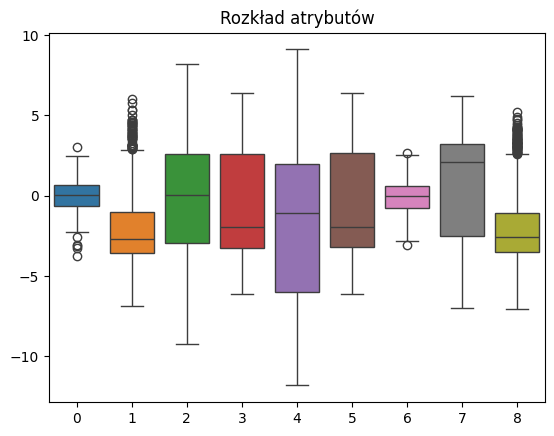

In [11]:
sns.boxplot(data=df_median.drop('klasa', axis=1))
plt.title('Rozkład atrybutów')
plt.show()

Kolejnym zidentyfikowanym problemem jest duża liczba outlierów w niektórych atrybutach. Duża liczba wartości odstajacych jest w szczególności niebezpieczna, w momencie wykorzystania algorytmów opartych na odległości (KNN) i klasteryzacji, gdzie mogą one zniekształcić centroidy (K-means). Kolumny 0 i 6 mają umiarkowaną ilość wartości odstających, natomiast 1 i 8 mają dużą liczbę outlierów (10–13%) co sugeruje, że mogą nie być błędami, lecz częścią naturalnego rozkładu (skośny lub bimodalny). Usunięcie ich byłoby ryzykowne w małym zbiorze (530 obserwacji). Z tej racji należy najpierw zbadać rozkład obu cech przed podjęciem dalszej decyzji.



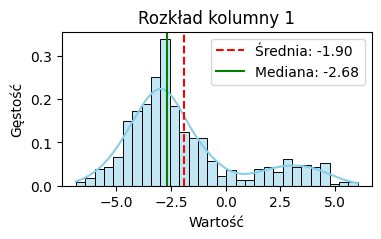

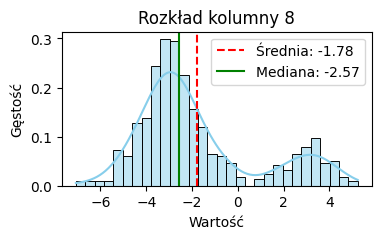

In [12]:
def plot_distribution_with_stats(df, column, title):
    plt.figure(figsize=(4, 2))
    sns.histplot(df[column], bins=30, kde=True, color='skyblue', stat='density')
    
    mean_val = df[column].mean()
    median_val = df[column].median()
    
    #Linia dla średniej i mediany, w celu łatwiejszego określenia kształtu rozkładu
    plt.axvline(mean_val, color='red', linestyle='--', label=f'Średnia: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='-', label=f'Mediana: {median_val:.2f}')
    
    plt.title(title)
    plt.xlabel('Wartość')
    plt.ylabel('Gęstość')
    plt.legend()
    plt.show()

# Wizualizacja rozkładu kolumny 1 i 8
plot_distribution_with_stats(df_median, '1', 'Rozkład kolumny 1')
plot_distribution_with_stats(df_median, '8', 'Rozkład kolumny 8')

 Jak można zaobserwowac powyżej oba atrybuty sa prawoskośne i bimodalne, co wskazuje na naturalne grupy w danych. Z tego powodu zostawiam zbiór taki jaki jest.

### Statystyki opisowe dla całego zbioru 

In [13]:
desc = df_median.describe()
desc

0           1           2           3           4           5  \
count  530.000000  530.000000  530.000000  530.000000  530.000000  530.000000   
mean    -0.000894   -1.897115   -0.014734   -0.665686   -1.714251   -0.607581   
std      0.948761    2.662052    3.667021    3.085359    4.550460    3.102955   
min     -3.761624   -6.836695   -9.229416   -6.140636  -11.807734   -6.140636   
25%     -0.623571   -3.584825   -2.946775   -3.240515   -5.988248   -3.210611   
50%      0.059116   -2.676964    0.043773   -1.925787   -1.048410   -1.912292   
75%      0.652221   -1.010237    2.599845    2.590200    1.995412    2.633203   
max      3.020380    6.026894    8.192991    6.402842    9.108108    6.402842   

                6           7           8       klasa  
count  530.000000  530.000000  530.000000  530.000000  
mean    -0.045497    0.681524   -1.776876    1.984906  
std      0.972800    3.080191    2.641736    1.420801  
min     -3.089081   -6.971801   -7.073487    0.000000  
25%     -0.756095   -2.495590   -3.485242    1.000000  
50%      0.013994    2.082776   -2.571082    2.000000  
75%      0.613391    3.210784   -1.049857    3.000000  
max      2.682456    6.192817    5.237468    4.000000

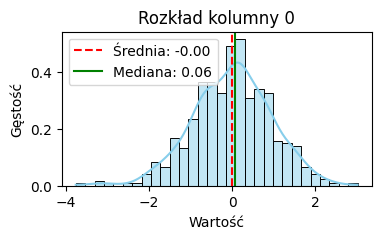

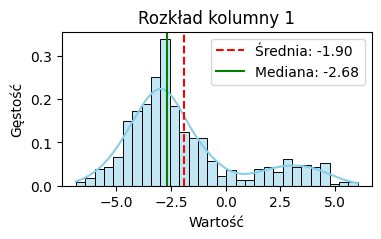

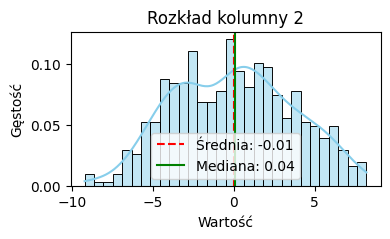

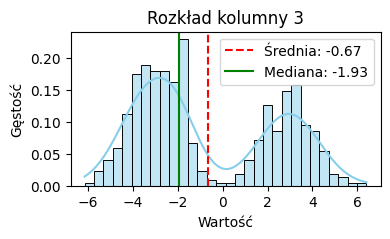

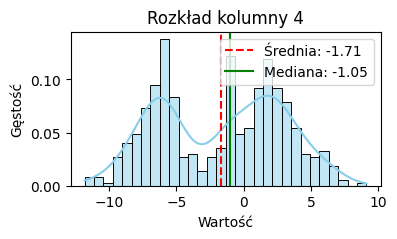

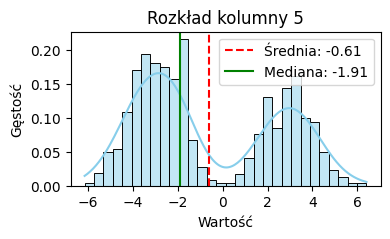

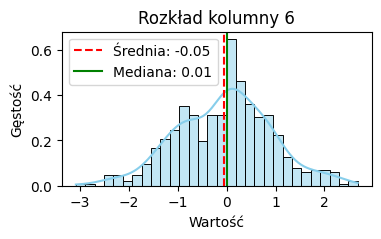

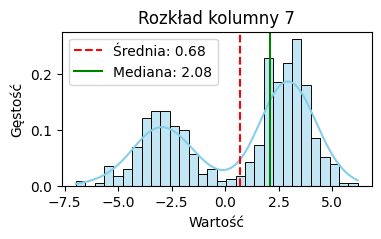

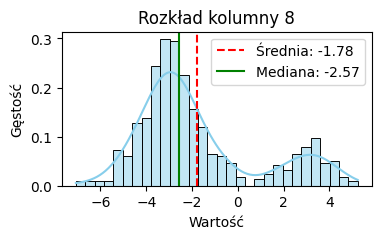

In [14]:
data=df_median.drop('klasa', axis=1)

for i in data.columns:
    plot_distribution_with_stats(df_median, i, f"Rozkład kolumny {i}")


Kolejnym krokiem jest ocena podstawowych miar statystyki opisowej. W pierwszej kolejności należy przeanalizować miary tendencji centralnej (średnia, mediana ew. moda) w celu wyznaczenia "środka" wartości atrybuty. Porównując do siebie średnią i medianę można stwierdzić jaki rozkład ma kszatłt (symetryczny, prawo czy lewo skośny). 

W naszym przypadku, przy pomocy stworzonej wcześniej funkcji pomocniczej plot_distribution_with_stats mogłem zwizualizować każdy atrybut opisujący. Na podstawie wizualizacji da się zauważyć, że rozkłady kolumn 0, 2 i 6 są bliskie rozkładowi symetrycznemu (mediana = średnia), nastomiast kolumny 1, 3, 5, 7 i 8 mają rozkłady bimodalne co wskazuje na naturalnie powstałe grupy. Wyjątkiem od reguły charakteryzuje się kolumna 4, która ma 3 piki - dwa bardzo dobrze widoczne i jeden pik danych ze zbliżonymi wartoścami do mediany. W przypadku kolumny 4 możliwy będzie podział na 4 grupy. 

In [15]:
desc.loc['miara rozstępu'] = desc.loc['max'] - desc.loc['min'] 
desc

0           1           2           3           4  \
count           530.000000  530.000000  530.000000  530.000000  530.000000   
mean             -0.000894   -1.897115   -0.014734   -0.665686   -1.714251   
std               0.948761    2.662052    3.667021    3.085359    4.550460   
min              -3.761624   -6.836695   -9.229416   -6.140636  -11.807734   
25%              -0.623571   -3.584825   -2.946775   -3.240515   -5.988248   
50%               0.059116   -2.676964    0.043773   -1.925787   -1.048410   
75%               0.652221   -1.010237    2.599845    2.590200    1.995412   
max               3.020380    6.026894    8.192991    6.402842    9.108108   
miara rozstępu    6.782004   12.863589   17.422407   12.543478   20.915842   

                         5           6           7           8       klasa  
count           530.000000  530.000000  530.000000  530.000000  530.000000  
mean             -0.607581   -0.045497    0.681524   -1.776876    1.984906  
std               3.102955    0.972800    3.080191    2.641736    1.420801  
min              -6.140636   -3.089081   -6.971801   -7.073487    0.000000  
25%              -3.210611   -0.756095   -2.495590   -3.485242    1.000000  
50%              -1.912292    0.013994    2.082776   -2.571082    2.000000  
75%               2.633203    0.613391    3.210784   -1.049857    3.000000  
max               6.402842    2.682456    6.192817    5.237468    4.000000  
miara rozstępu   12.543478    5.771537   13.164617   12.310956    4.000000

Po zakończeniu analizy miar tendencji centralnej można przejsc do analizy miar rozproszenia, między innymi takich jak odchylenie standardowe i rozstęp. Krok ten jest na tyle kluczowy, ze pozwala ocenić, czy przeskalowanie cech numerycznych jest konieczne. Różnice w skali (mierzone przez std) oznaczają, że cechy mają różne zakresy wariancji. Modele oparte na odległościach (np. SVM, k-means, KNN) są wrażliwe na takie różnice, ponieważ cechy z większym std będą dominować w obliczeniach. Skalowanie zapewnia, że każda cecha wnosi równy wkład, co jest szczególnie ważne przy ograniczonej liczbie danych.

Analizując statystyki omawianych danych można zauwazyć duże różnice w std (od 0.948761 do 4.550460) i zakresach (od 5.771537 do 20.915842) co oznacza, że cechy są w różnych skalach.  Z tego powodu w fazie 3, podczas przygotowywania danych do modelowania, dane zostaną przeskalowane.

### Statystyki opisowe dla poszczególnych klas 

In [16]:
classes = df_median['klasa'].unique()

for c in classes:
    df_class = df_median[df_median['klasa']==c]
    desc_class = df_class.describe()
    
    print(f'klasa: {c}')
    print(desc_class)
    print(50*'--')

klasa: 4
                0           1           2           3           4           5  \
count  105.000000  105.000000  105.000000  105.000000  105.000000  105.000000   
mean    -0.045709   -2.874234    2.188647   -2.965571   -5.994718   -2.944756   
std      0.837119    1.130983    1.722936    1.041241    1.183900    1.079603   
min     -3.227290   -5.085956   -2.353296   -6.140636   -8.951744   -6.140636   
25%     -0.605651   -3.677089    1.117843   -3.612886   -6.733546   -3.612886   
50%      0.059116   -2.862254    2.097930   -2.983968   -6.043457   -2.925574   
75%      0.456744   -2.214675    3.368951   -2.224961   -5.379746   -2.133622   
max      2.315096   -0.296216    6.219143    0.657258   -1.048410    0.657258   

                6           7           8  klasa  
count  105.000000  105.000000  105.000000  105.0  
mean    -0.039897    2.894510   -2.987081    4.0  
std      0.896512    0.899983    1.612707    0.0  
min     -2.498799    0.251826   -7.073487    4.0  
25%   

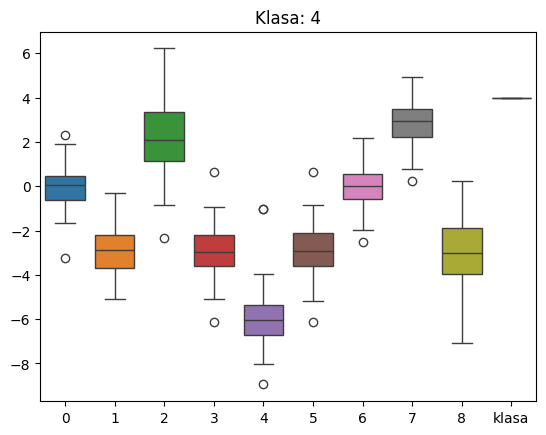

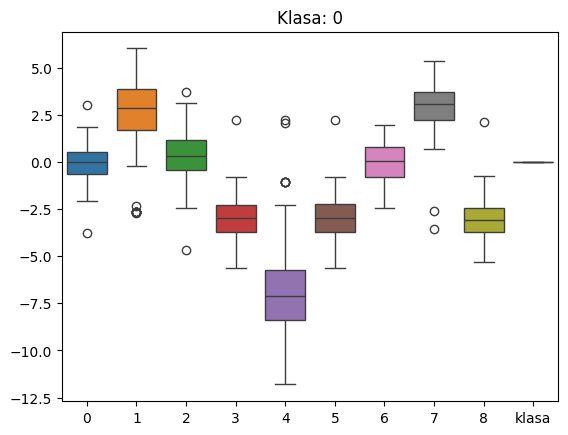

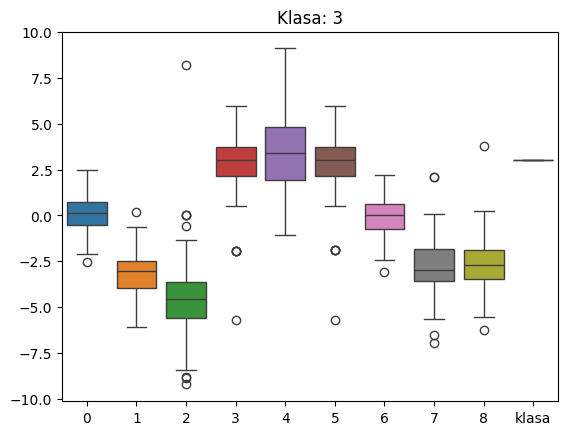

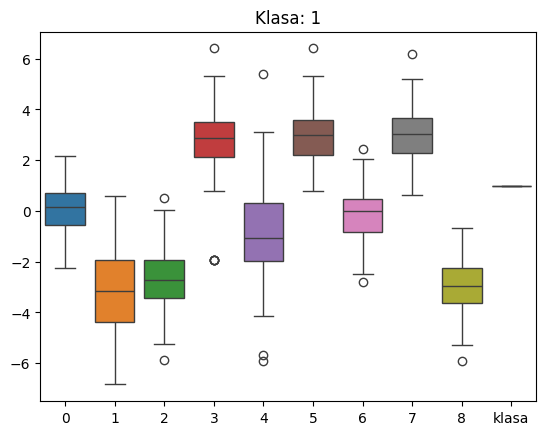

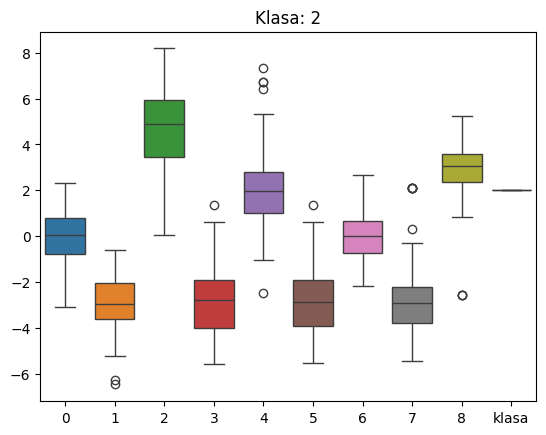

In [17]:
for c in classes:
    df_class = df_median[df_median['klasa']==c]
    sns.boxplot(data=df_class)
    plt.title(f"Klasa: {c}")
    plt.show()

### Sprawdzenie czy klasy są zbalansowane

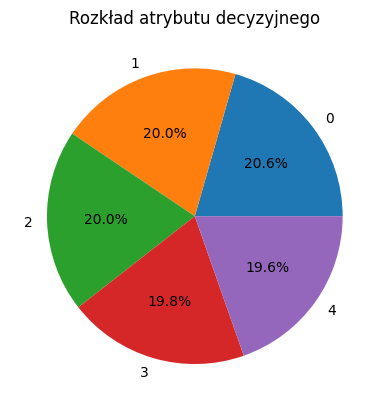

In [18]:
classes = df["klasa"].value_counts()
plt.pie(classes, labels= ['0', '1','2','3','4'], autopct='%1.1f%%')
plt.title('Rozkład atrybutu decyzyjnego')
plt.show()

Ważdnym elementem EDA jest sprawdzenie czy klasy są jednakowo reprezentowane (zbalansowane). Analizowany zbiór danych ma jak najbardziej zbalansowany zbiór co nie wymaga dodatkowych akcji jak Oversampling, Undersampling czy SMOTE.

### Badanie zależności między zmiennymi

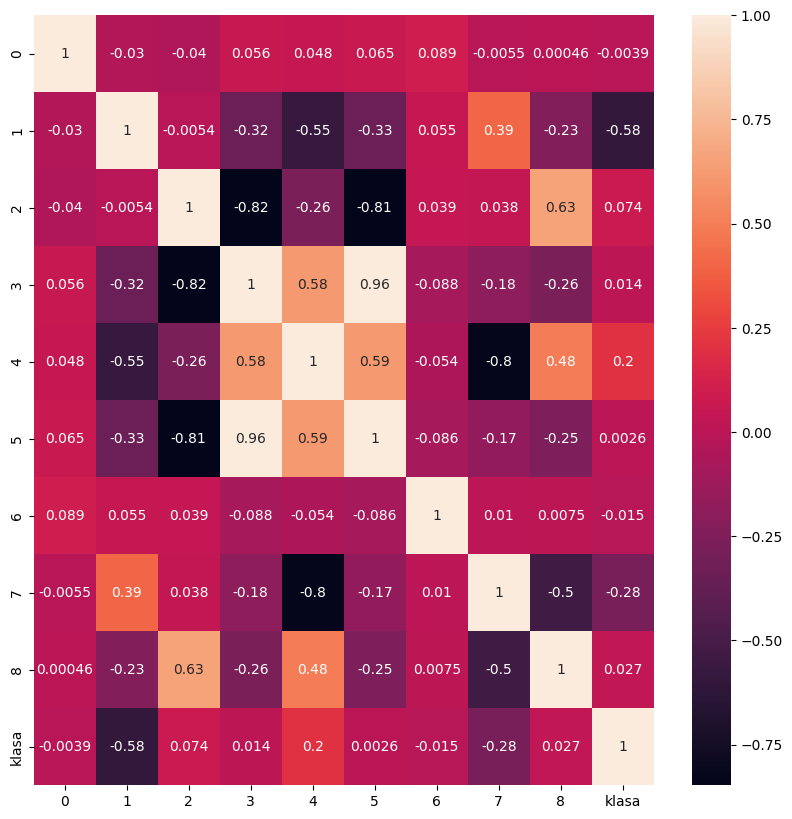

In [19]:
plt.figure(figsize=(10,10),dpi = 100)
sns.heatmap(df.corr(),annot = df_median.corr())
plt.show()

Do analizy korelacji może posłużyć mapa ciepła, w celu znaleznia najbardziej skorelowanych ze sobą zmiennych. Jest to istotne, ponieważ w sytuacji gdy mamy silnie skorelowane cechy to jedna z nich może być zbędna, co uprości model i zredukuje wielowymiarowość. 

Na podstawie powyższej mapy cieplnej można zauważyć, że:
1. kolumnny 3 i 5 są skorelowane na 0.96 (najwięcej)
2. kolumnny 2 i 5 są skorelowane na -0.81 
3. kolumnny 2 i 3 są skorelowane na -0.82 
4. kolumnny 4 i 7 są skorelowane na -0.8 

W tym przypadku warto usunąć kolumne 3 lub 5, ponieważ są niemal idealnie skorelowane. Dodatkowo można rozważyć usunięcie kolumny 4 i 7.

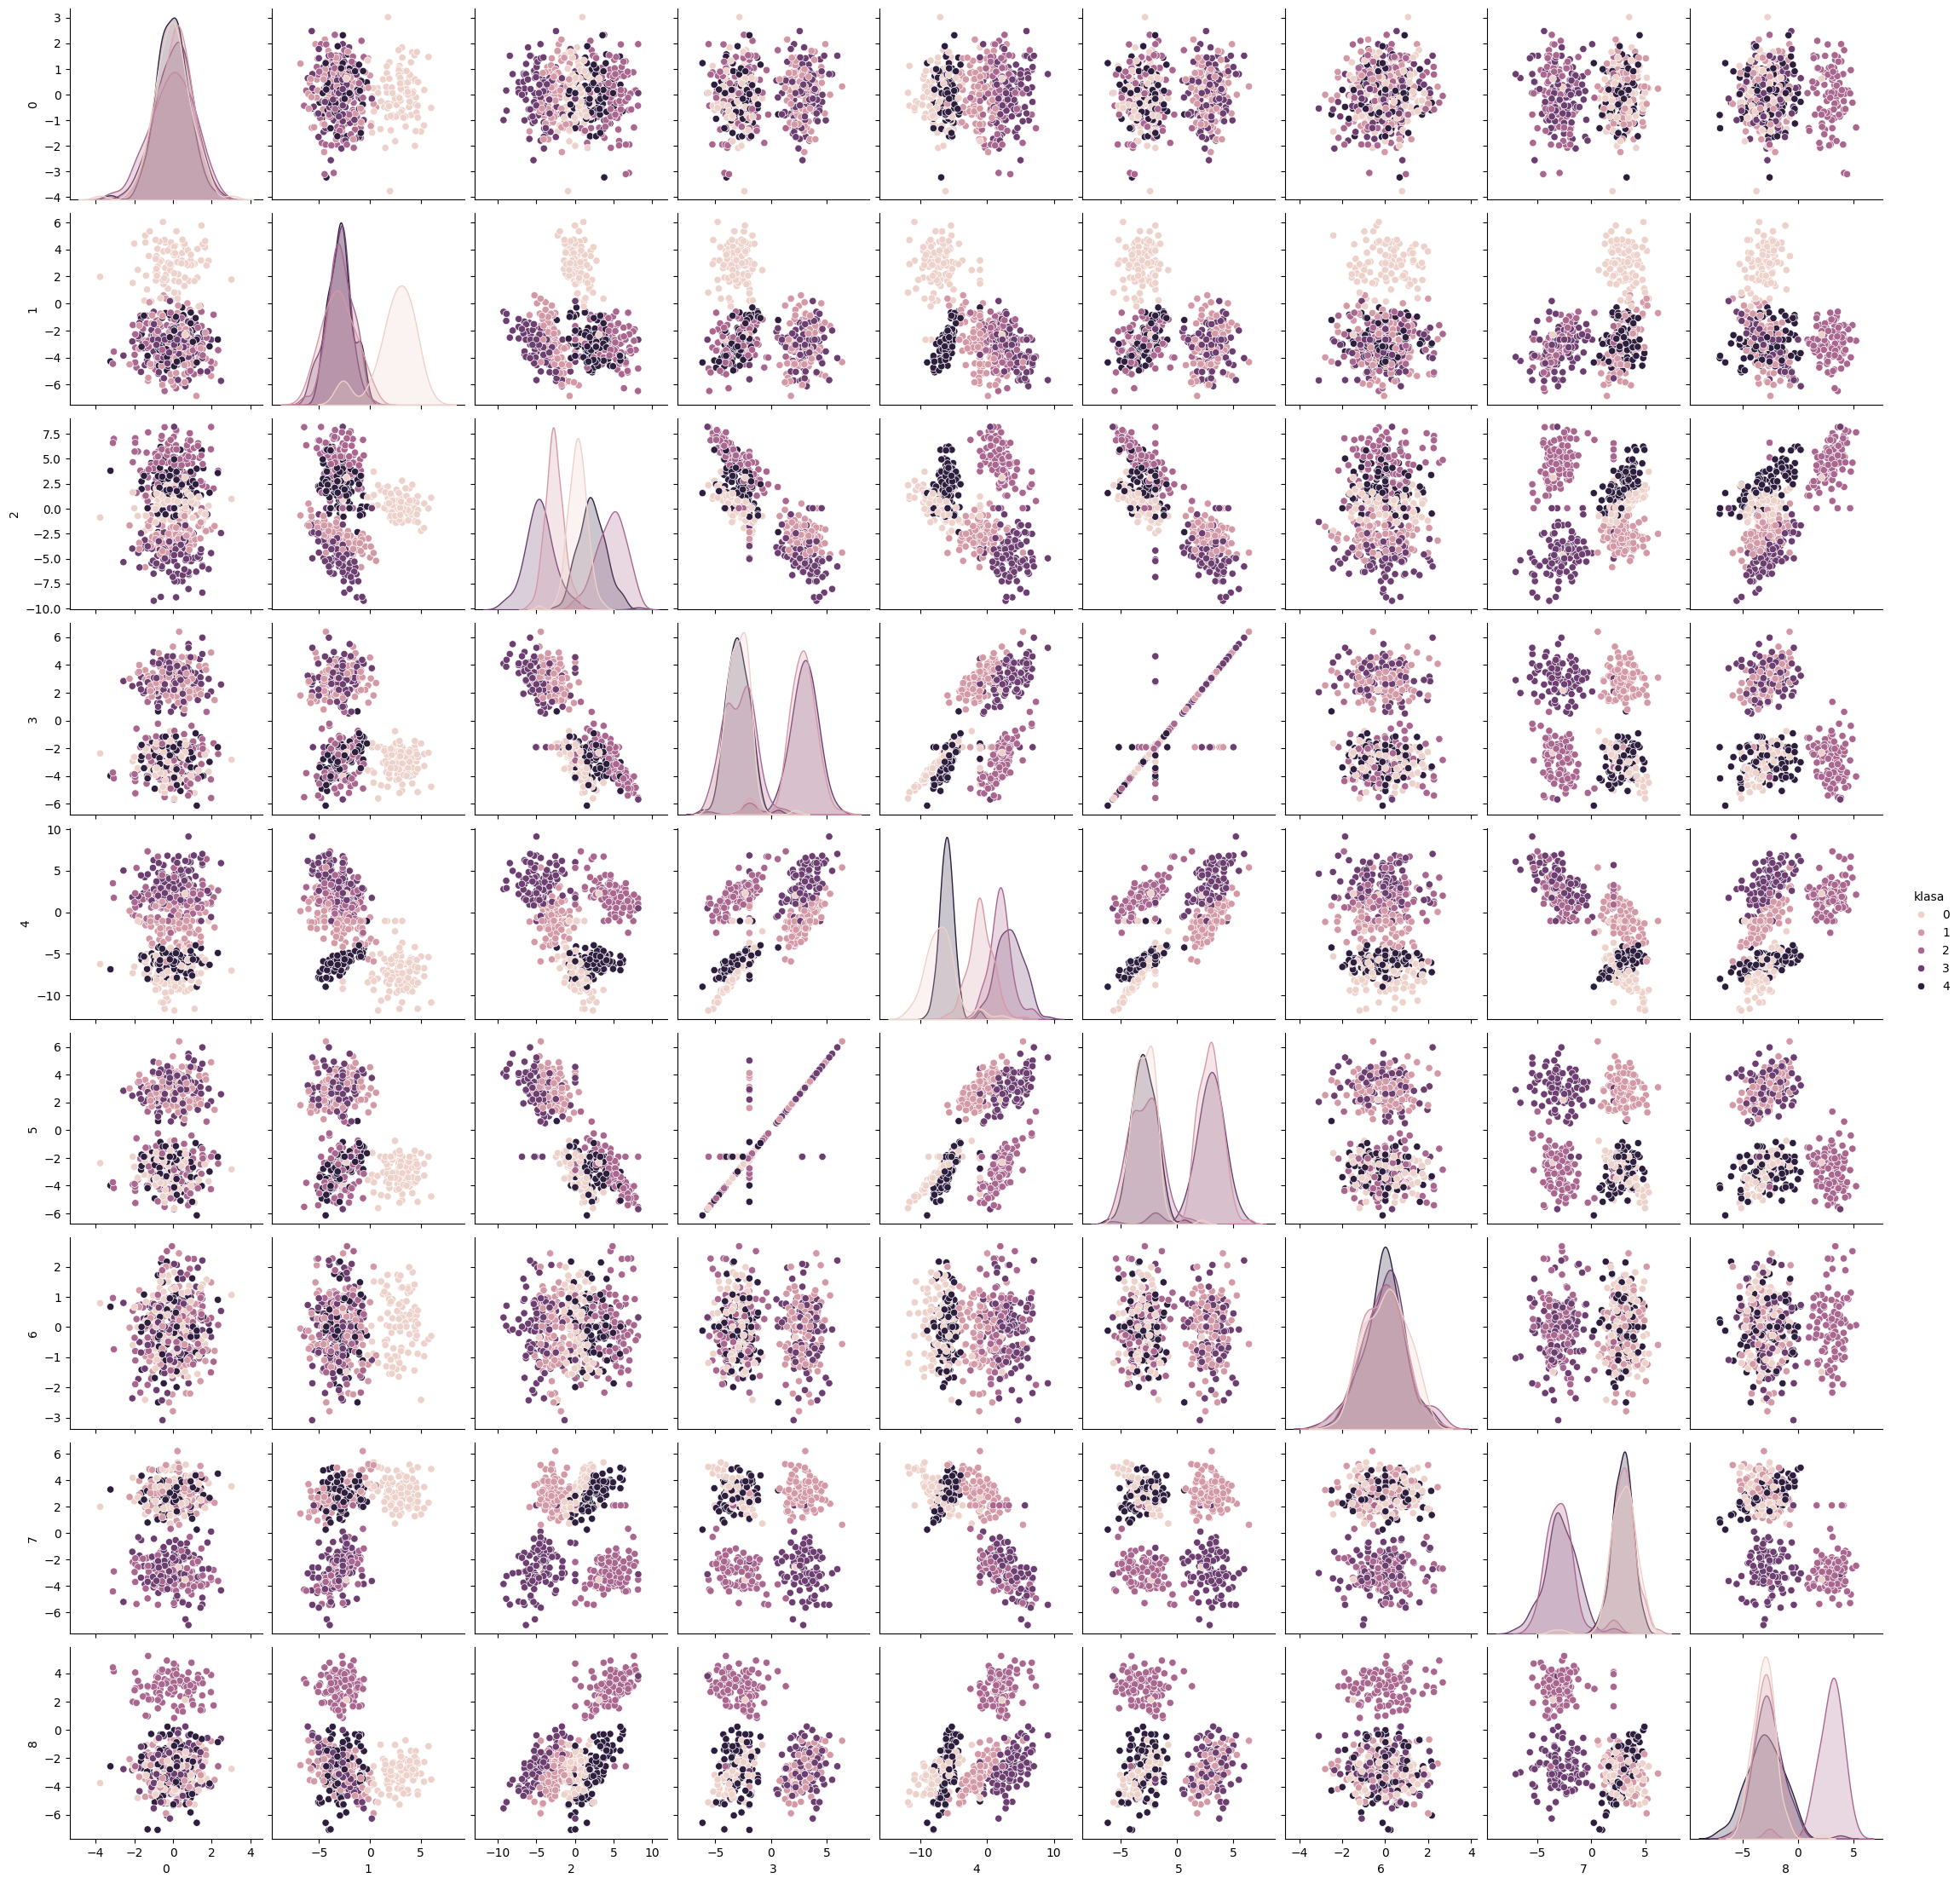

In [20]:
sns.pairplot(df_median, kind="scatter", hue = "klasa")
plt.show()

Podział na grupy reprezentowane przez atrybut decyzyjny moim zdaniem nie odpowiada naturalnym skupieniom danym. Mozna zauważyc, że często skupiska stanowią mieszankę różnych klas. atrybut decyzyjny zawiera w sobie 5 klas, na powyższym wykresie można zauważyć, że obserwacje tworzą od minimalnie dwóch do maksymalnie czterech skupisk. W żadnym przypadku nie ma 5 czystych skupisk danych. Na podstawie powyzszych wykresów, na ten moment mogę obstawić że podczas późniejszej klasteryzacji 3 klastry będą najbardziej optymalne. Z wykresu równiez można zobaczyć wcześniejszy wniosek tj. jak mocno skorelowane są ze sobą atrybuty 3 i 5.

## Faza 3. Przygotowanie danych 
Przygotowanie danych, czyli przygotowanie ostatecznego zbior, który będzie następnie przetwarzany technikami modelowania danych. Etap ten obejmuję między innymi 
1. Preprocessing (jesli nie został wczesniej zrobiony), w tym przypadku pozostaje tylko przeskalowanie danych.
2. Feature engineering - wykorzystanie wiedzy domenowej do stworzenia nowych cech. W przypadku tego zadania jest niemożliwy, ponieważ dane są zanonimizowane i nie wiadomo co ze sobą reprezentują.
3. Feature Selection - proces wyboru podzbioru najbardziej istotnych zmiennych spośród wszytskich dostępnych w zbiorze danych.
4. Podział na zbiory/Wybranie strategii walidacyjnej (np. podział na zbiór uczący i testowy lub k-krotna walidacja krzyżowa)


### Usuwanie niepotrzebnych cech i przygotowanie danych do następnej fazy 

In [21]:
XX = df_median.drop("5",axis=1)
XX.head()

0         1         2         3         4         6         7  \
0 -1.128375 -2.366789  4.558300 -2.857641 -5.056359  0.640082  4.029135   
1  1.259990  4.031091  0.453629 -2.370334 -5.488193  0.361055  2.082776   
2 -0.771091 -1.224854 -2.353296  0.657258 -4.234517 -2.498799  3.228586   
3  0.512798 -4.033628  3.667745 -4.462235 -7.074139 -0.113639  2.692133   
4  0.282831  3.085310  0.917489 -3.368534 -7.959475 -0.683816  3.720747   

          8  klasa  
0 -0.284809      4  
1 -1.475165      0  
2 -4.281272      4  
3 -3.171938      4  
4 -2.930038      0

Na podstawie wcześniejszych wniosków postanowiem usunąć kolumne "5"

In [22]:
X = XX.drop('klasa', axis=1)
y = XX['klasa']

Powyższy kod wydziela zmienną docelową ze zbioru danych 

### Standaryzacja danych 

In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_median.drop('klasa', axis=1))

# Nowy DataFrame ze skalowanymi cechami
df_scaled = pd.DataFrame(X_scaled, columns=df.columns[:-1])
df_scaled['klasa'] = df['klasa'].values

# Sprawdzenie statystyk po skalowaniu
print("Statystyki po skalowaniu:\n", df_scaled.describe())

Statystyki po skalowaniu:
                 0             1             2             3             4  \
count  530.000000  5.300000e+02  5.300000e+02  5.300000e+02  5.300000e+02   
mean     0.000000  6.368072e-17 -1.508228e-17 -2.681293e-17 -2.010970e-17   
std      1.000945  1.000945e+00  1.000945e+00  1.000945e+00  1.000945e+00   
min     -3.967579 -1.857306e+00 -2.515226e+00 -1.776170e+00 -2.220219e+00   
25%     -0.656926 -6.345875e-01 -8.003257e-01 -8.353197e-01 -9.401324e-01   
50%      0.063311 -2.932271e-01  1.597011e-02 -4.087988e-01  1.464622e-01   
75%      0.689038  3.334705e-01  7.136717e-01  1.056267e+00  8.159983e-01   
max      3.187451  2.979466e+00  2.240369e+00  2.293155e+00  2.380547e+00   

                  5             6             7             8       klasa  
count  5.300000e+02  5.300000e+02  5.300000e+02  5.300000e+02  530.000000  
mean   3.351617e-17  8.379042e-18 -6.703233e-18 -1.089275e-17    1.984906  
std    1.000945e+00  1.000945e+00  1.000945e+00  1.

Na podstawie wniosków z fazy 2, dane musza zostac przeskalowane. Do wykonania tego zadania wybrałem Standaryzacje (StandardScaler()). Powyższy kod jest tylko w celach demonstarcyjnych, ponieważ standaryzacje w następnej fazie bedzie wykonywał pipeline.

### Wybranie strategii walidacyjnej

In [24]:
cv = KFold(n_splits=5, shuffle=True, random_state=1)

Ponieważ klasy są zbalansowane (5 klas, w miarę równomierny rozkład), a zbiór danych jest dosyć mały (530 obserwacji), najlepszą strategią walidacyjną dla uczenia nadzorowanego będzie k-krotna walidacja krzyżowa. Technika ta jest wykorzystywana głownie włąsnie dla mniejszych zbirów i w momencie gdy istnieje ryzyko nadmiernego dopasowania 



## Faza 4. i Faza 5. Modelowanie i ocena

Z racji tego że zadanie polega na wykorzystaniu zarówno technik uczenia nadzorowanego jak i nienadzorowanego to połączyłem powyższe fazy w jedną.

### Techniki uczenia nadzorowanego 

In [25]:
# Wybrane klasyfikatory
classifiers = {
    'KNN': KNeighborsClassifier(n_neighbors=10),  
    'Naiwny klasyfikator Bayesa': GaussianNB(),
    'Drzewo decyzyjne': DecisionTreeClassifier(random_state=1),
    "Najbliższych prototypów": NearestCentroid(),
    "Support Vector Machine": SVC(kernel='linear')
}

# Przechowywanie wyników każdeo modelu
results = {}

# Testowanie każdego klasyfikatora
for name, clf in classifiers.items():
    # Pipeline z skalowaniem
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', clf)
    ])
    
    # Walidacja krzyżowa
    scores = cross_val_score(pipeline, X, y, cv=cv, scoring='f1_weighted')
    
    # Zapis wyników
    results[name] = {
        'mean_f1': scores.mean(),
        'std_f1': scores.std(),
        'scores': scores
    }


W pierwszej kolejności chciałbym wytłumaczyć czemu postanowiłem skorzystać z pipeline-u. Po pierwsze zapobiega wyciekowi danych (data leakage) podczas walidacji krzyżowej. Pipeline zapewnia, że skalowanie (StandardScaler) jest wykonywane tylko na danych treningowych w każdym foldzie K-Fold. Parametry skalowania (średnia, odchylenie standardowe) są obliczane na foldach treningowych i stosowane do foldów testowych, co zapobiega wyciekowi danych. Drugi powód jest trywialny, ale po prostu kod jest bardziej przejrzysty i czytelny.

Tłumacząc już bezpośrednio kod, na początku w zmiennej classifiers wybrałem i zapisałem te klasyfikatory, które chce żeby były ucozny na danych treningowych. Następnie każdy model jest umieszczany w pipeline’ie, który łączy skalowanie (StandardScaler) z klasyfikacją w jeden spójny proces. Pipeline automatycznie skaluje dane treningowe i testowe w każdym foldzie K-Fold, trenuje model na przeskalowanych danych treningowych i ocenia go na danych testowych. Wyniki są przechowywane w zmiennej results.



Do oceny klasyfikatorów wybrałem f1_weighted, ponieważ jest to metryka dla wieloklasowej klasyfikacji, uwzględniająca zarówno precyzję, jak i czułość dla każdej klasy, ważona ich liczebnością. Moim zdaniem jest odpowiednia dla małego zbioru danych (530 obserwacji) z potencjalnymi wyzwaniami, jak outliery. Gdyby klasy były idealnie zbalansowane, accuracy mogłaby być alternatywą, ale f1_weighted daje lepszy obraz jakości modelu.



Wyniki walidacji krzyżowej (F1-weighted):
KNN:
  Średni F1-score: 0.9621
  Odchylenie standardowe foldów: 0.0119
  Wyniki dla foldów: [0.9616 0.9621 0.9812 0.9434 0.9622]

Naiwny klasyfikator Bayesa:
  Średni F1-score: 0.9564
  Odchylenie standardowe foldów: 0.0076
  Wyniki dla foldów: [0.9432 0.962  0.9622 0.9524 0.9622]

Drzewo decyzyjne:
  Średni F1-score: 0.9509
  Odchylenie standardowe foldów: 0.0182
  Wyniki dla foldów: [0.9437 0.9811 0.9521 0.9246 0.9528]

Najbliższych prototypów:
  Średni F1-score: 0.9603
  Odchylenie standardowe foldów: 0.0149
  Wyniki dla foldów: [0.9711 0.9716 0.9718 0.9343 0.9529]

Support Vector Machine:
  Średni F1-score: 0.9547
  Odchylenie standardowe foldów: 0.0094
  Wyniki dla foldów: [0.9433 0.9528 0.972  0.9525 0.9527]



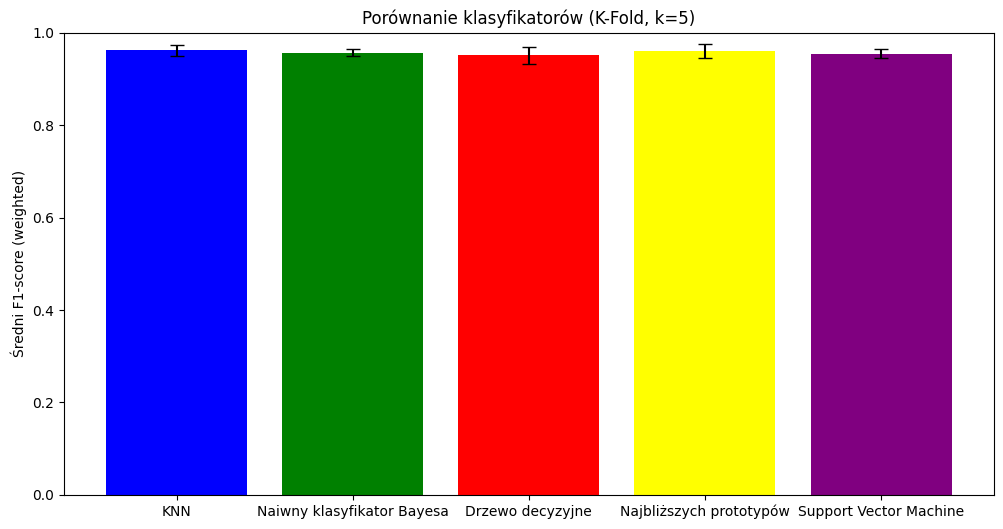

In [26]:
# Wyświetlenie wyników
print("Wyniki walidacji krzyżowej (F1-weighted):")
for name, res in results.items():
    print(f"{name}:")
    print(f"  Średni F1-score: {res['mean_f1']:.4f}")
    print(f"  Odchylenie standardowe foldów: {res['std_f1']:.4f}")
    print(f"  Wyniki dla foldów: {res['scores'].round(4)}")
    print()

# Wizualizacja wyników
mean_scores = [res['mean_f1'] for res in results.values()]
std_scores = [res['std_f1'] for res in results.values()]
models = list(results.keys())

plt.figure(figsize=(12, 6))
plt.bar(models, mean_scores, yerr=std_scores, capsize=5, color=['blue', 'green', 'red', 'yellow','purple'])
plt.ylabel('Średni F1-score (weighted)')
plt.title('Porównanie klasyfikatorów (K-Fold, k=5)')
plt.ylim(0, 1)
plt.show()

Podsumowując wszystkie modele osiągają wysokie F1-score (>0.95), co wskazuje, że dane zostały dobrze przygotowane (usunięcie kolumny 5, skalowanie). Ponadto każdy z modeli charakteryzuje się niskimi ochyleniami standardowymi, co potwierdza stabilność wyników w walidacji krzyżowej (Największe w drzewie decyzyjnym: 0.0182, najmniejsze w naiwnym klasyfikatorze Bayesa: 0.0076). Różnice między modelami są niewielkie (0.9509 vs 0.9621), więc wybór najlepszego modelu może zależeć od dostrojenia hiperparametrów. Ogólnie najlepiej wypadł Knn, który pomimo zachowania outlierów, prezentuje najlepszy wynik F1. W ramach dalszych eksperymentów, w celu osiągniecia jeszcze lepszego wyniku, możnaby było w fazie 2 usunąć outliery z kolumn 0 i 6 oraz przy pomocy np. GridSearchCV dobrać jak najlepsze hiperparametry dla tego algorytmu.




### Techniki uczenia nienadzorowanego 

In [27]:
df_reduced = df_median.drop("5",axis=1)

# Przygotowanie danych (pomijamy 'klasa')
X = df_reduced.drop('klasa', axis=1)
y = df_reduced['klasa']

# Skalowanie danych
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Powyzej prezentują się przygotowane dane tj. ustandaryzowany zbiór danych bez atrybuty decyzyjnego. W dalszych krokach, do przeprowadzenia grupowania wykorzystam algorytm K-Means.

In [28]:
k_range = range(2, 11)
inertia = []
silhouette_scores = []
ari_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    
    # Inertia (suma kwadratów odległości do centroidów)
    inertia.append(kmeans.inertia_)
    
    # Silhouette Score (spójność klastrów)
    silhouette = silhouette_score(X_scaled, clusters)
    silhouette_scores.append(silhouette)
    
    # Adjusted Rand Index (zgodność z 'klasa')
    ari = adjusted_rand_score(y, clusters)
    ari_scores.append(ari)

C:\Users\micha\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\micha\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


W celu znalezienia jak najlepszej liczby grup (K) przetestuje liczbę grup od 2 do 10, oceniając jakość klasteryzacji za pomocą metryk: Silhouette Score (spójność klastrów) i Inertia (zwartość klastrów). W Silhouette Score szukamy jak najwyzszą średnią miarę sylwetki - im wyzsza tym lepsze grupowanie. W metodzie łokcia (Elbow Method) oblicza się tzw. inertie – sumę kwadratów odległości punktów od środka klastra - szukamy miejsca, gdzie krzywa się wypłaszcza (łokcia).

Ponieważ w zadaniu jest mowa o ocenie czy algorytm dobrze pogrupował dane, wykorzystałęm również trzecią metryke jaką jest Adjusted Rand Index (ARI). Przy pomocy tej metryki jestem w stanie sprawdzić jak bardzo klasteryzacja pokrywa się z „prawdziwymi” grupami w danych. ARI porównuje dwie różne etykiety klastrów: jedną stworzoną przez algorytm K-means, a drugą rzeczywistą (etykiety zostały zapisane w zmiennej y). Jesli ARI jest wysokie to oznacza, że w danej liczbie grup k klasteryzacja pokrywa się z istniejącymi klasami.


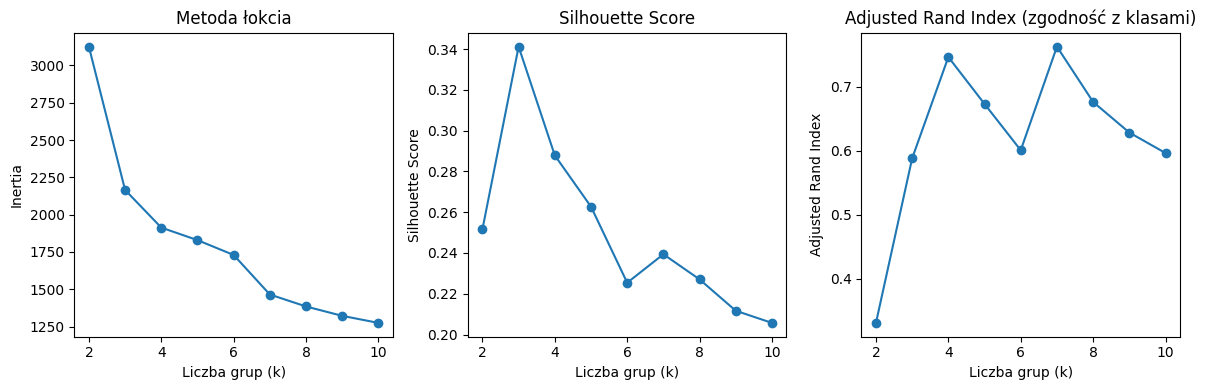

Optymalna liczba grup (Silhouette Score): k=3, Score=0.3412
Optymalna liczba grup (ARI): k=7, Score=0.7629


In [29]:
# Wizualizacja Inertia (Elbow Method)
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Liczba grup (k)')
plt.ylabel('Inertia')
plt.title('Metoda łokcia')

# Wizualizacja Silhouette Score
plt.subplot(1, 3, 2)
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Liczba grup (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

# Wizualizacja Adjusted Rand Index
plt.subplot(1, 3, 3)
plt.plot(k_range, ari_scores, marker='o')
plt.xlabel('Liczba grup (k)')
plt.ylabel('Adjusted Rand Index')
plt.title('Adjusted Rand Index (zgodność z klasami)')

plt.tight_layout()
plt.show()

optimal_k_silhouette = k_range[np.argmax(silhouette_scores)]
optimal_k_ari = k_range[np.argmax(ari_scores)]
print(f"Optymalna liczba grup (Silhouette Score): k={optimal_k_silhouette}, Score={max(silhouette_scores):.4f}")
print(f"Optymalna liczba grup (ARI): k={optimal_k_ari}, Score={max(ari_scores):.4f}")

Okazuje się, że metryki jakości nie są jednomyślne jesli chodzi o najbardziej optymalną liczbę klastów. Metoda sylwetki wskazuje k=3, metoda ARI k=7, a jeśli chodzi o wizualizacje metodą łokcia to ciężko znaleźć na niej łokieć. Dlatego spróbuje zwizualizować podziały na grupy przez algorytm k-means dla każdego k od 1 do 10.

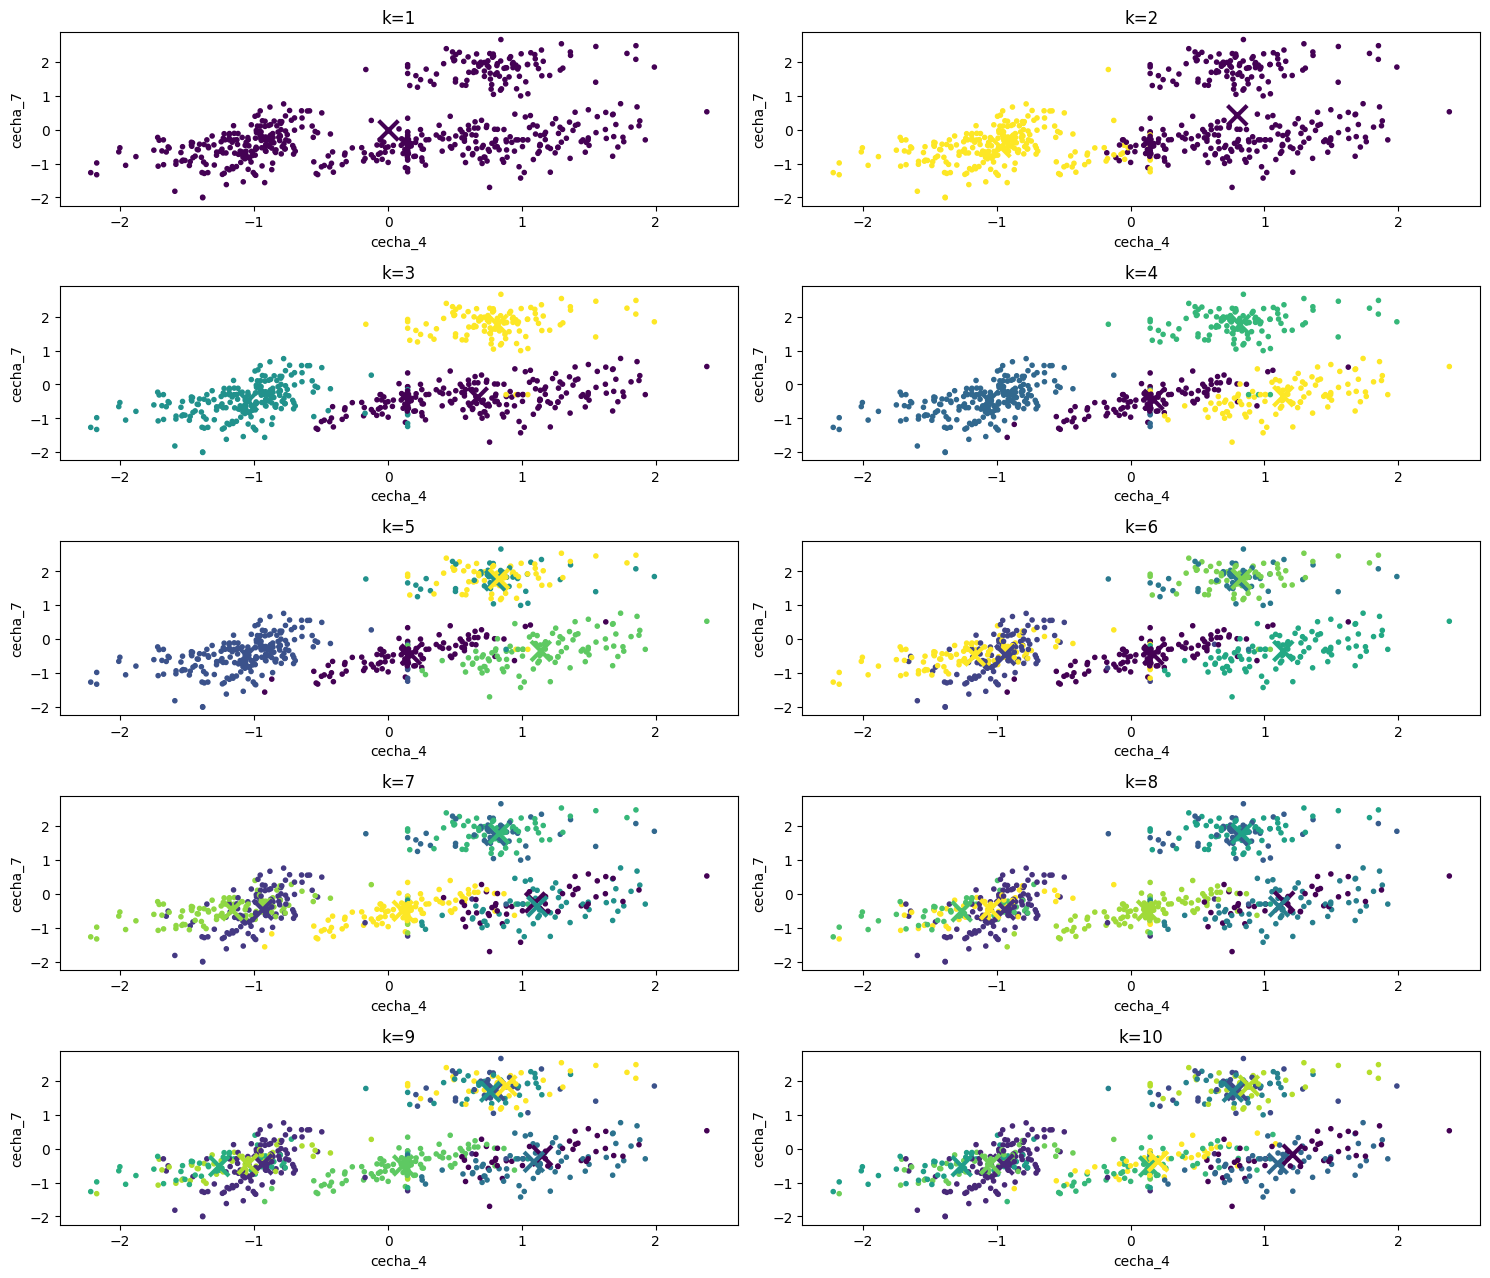

In [30]:
X_viz = X_scaled[:, [4, 7]]  
feature_names = ['cecha_4', 'cecha_7'] 

maks_k = 10
zakres_k = range(1, maks_k + 1)
ile_w_pionie = int(maks_k / 2) + 1
plt.figure(figsize=(15, 15))

# Klasteryzacja i wizualizacja dla k od 1 do 10
pozycja = 1
for k in zakres_k:
    plt.subplot(ile_w_pionie, 2, pozycja)
    pozycja += 1
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
    etykiety_klastrow = kmeans.fit_predict(X_scaled) 
    plt.scatter(X_viz[:, 0], X_viz[:, 1], c=etykiety_klastrow, marker='.')
    
    # Centroidy dla wybranych cech
    centroidy = kmeans.cluster_centers_[:, [4, 7]]  
    plt.scatter(centroidy[:, 0], centroidy[:, 1], c=np.array(range(k)), marker='x', s=200, linewidths=3, cmap='viridis')
    plt.title(f'k={k}')
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])

plt.tight_layout()
plt.show()


Moim zdaniem żaden podział nie jest idealny (nie reprezentuje "czystych" skupisk danych), ale jeśli miałbym wybierac wybrałbym k=3 lub ew. k=4, czyli tak samo jak to zrobiłem w fazie 2.

## Faza 6. Wdrożenie  

Powyższe zadanie nie wdrażam na produkcje, dlatego pomijam całkowicie ten krok.

## Podsumowanie 

Celem projektu było przeprowadzenie analizy, grupowania (techniki nienadzorowane) i klasyfikacji (techniki nienadzorowane) na indywidualnie 
przygotowanym zbiorze danyc (zbiór 16). Zadanie wykonałem na podstawie metodologi CRISP-DM, ponieważ bardzo dobrze opisuje ona zadania realizowane w każdej z faz typowego projektu eksploracji danych / data miningu. Po wykonaniu pierwszych trzech kroków, kóre między innymi polegały na EDA, Preprocessingu i na przygotowaniu danych do modelowania, wykoanłem na początku klasyfikacje a pózniej grupwanie na zbiorze bez atrybutu docelowego. W klasyfikacji wykorzystałem modele: KNN, Naiwny klasyfikator Bayesa, Drzewo decyzyjne Najbliższych prototypów i Support Vector Machine. Najlepiej dopasował sie do danych algorytm KNN. Do grupowania wykorzystałem algorytm K-means, który wskazał 3/4 klastry jako idealne grupowanie. 